# Mathematical Underpinnings - Lab 2
# Krzyziński Mateusz

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(23)

## Task 1

### a)

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y)$$
$$R(a,a^*) = \mathbb{E}(aX - Y)^2$$
$$R(a,a^*) = \mathbb{E}(aX - X - \varepsilon)^2$$
$$R(a,a^*) = \mathbb{E}((a-1)X - \varepsilon)^2$$
$$R(a,a^*) = \mathbb{E}[((a-1)^2X^2 - 2(a-1)X\varepsilon + \varepsilon^2)]$$
$$R(a,a^*) = (a-1)^2\mathbb{E}X^2 - 2(a-1)\mathbb{E}X\mathbb{E}\varepsilon + \mathbb{E}\varepsilon^2$$
$$R(a,a^*) = (a-1)^2\mathbb{E}X^2 - 2(a-1) \cdot 0 \cdot 0 + \mathbb{E}\varepsilon^2$$
$$R(a,a^*) = (a-1)^2\mathbb{E}X^2 + \mathbb{E}\varepsilon^2$$
$$R(a,a^*) = (a-1)^2 + \sigma^2$$

So, in our task $a^* = 1$.

The population risk minimizer stays the same for all values of $\sigma^2$. 

In [3]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [4]:
n = 50 
sigma_eps = 1 

x = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma_eps, n)
y = x + eps 

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [5]:
def empirical_risk(a, x, y):
    return np.mean((y - a*x)**2)

### c)

$$\hat{R}(a, a^*) = \frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$$
$$\hat{R}(a, a^*) = \frac{1}{n} \sum_{i=1}^n (a^2x_i^2 - 2ax_iy_i + y_i^2)$$

We see that it is a quadratic function of $a$, so 
$$\hat{a} = \arg \min_{a} \hat{R}(a, a^*) = \frac{2 \cdot \frac{1}{n} \sum_{i=1}^n x_iy_i}{2\cdot\frac{1}{n}\sum_{i=1}^n x_i^2}$$
$$\hat{a} = \frac{\sum_{i=1}^n x_iy_i}{\sum_{i=1}^n x_i^2}$$

In [6]:
def erm_minimiser(x, y):
    return np.mean(y*x)/np.mean(x**2)

In [7]:
a_star = 1 

In [8]:
population_risk_min = population_risk(a_star, sigma_eps)
population_risk_min

1

In [9]:
a_hat = erm_minimiser(x, y)
a_hat

1.288668867509203

In [10]:
empirical_risk_min = empirical_risk(a_hat, x, y)
empirical_risk_min

0.9149386694240751

In [11]:
population_risk_a_hat = population_risk(a_hat, sigma_eps)
population_risk_a_hat

1.0833297150690457

In [22]:
a_vector = np.linspace(0, 2, 100)
population_risk_vector = population_risk(a_vector, sigma_eps)
empirical_risk_vector = [empirical_risk(a, x, y) for a in a_vector]

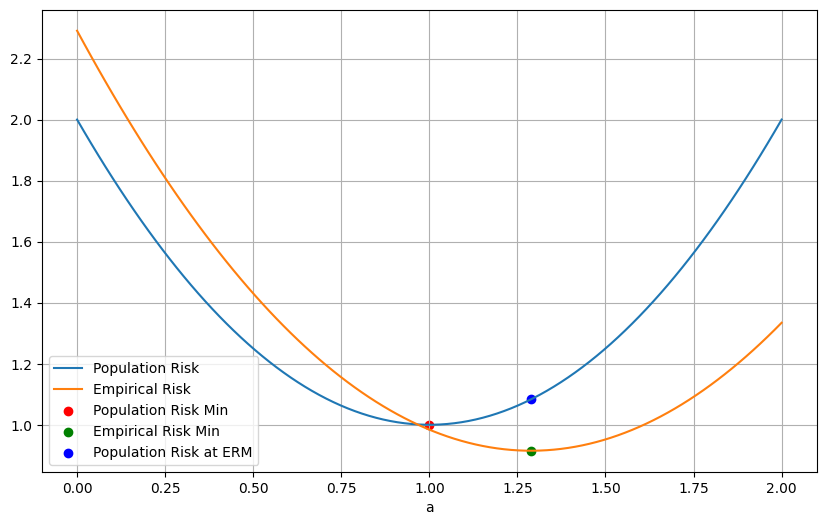

In [24]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(a_vector, population_risk_vector, label='Population Risk')
plt.plot(a_vector, empirical_risk_vector, label='Empirical Risk')
plt.scatter(a_star, population_risk_min, label='Population Risk Min', color='r')
plt.scatter(a_hat, empirical_risk_min, label='Empirical Risk Min', color='g')
plt.scatter(a_hat, population_risk_a_hat, label='Population Risk at ERM', color='b')
plt.xlabel('a')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [27]:
# excess risk
def excess_risk(a_hat, a_star, sigma_eps):
    return population_risk(a_hat, sigma_eps) - population_risk(a_star, sigma_eps)

In [28]:
excess_risk(a_hat, a_star, sigma_eps)

0.08332971506904574

In [29]:
L = 200 
excess_risk_vector = [None] * L
for i in range(L):
    x = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma_eps, n)
    y = x + eps 
    a_hat = erm_minimiser(x, y)
    excess_risk_vector[i] = excess_risk(a_hat, a_star, sigma_eps)

In [31]:
np.mean(excess_risk_vector)

0.02254450068831213

In [79]:
sample_sizes = np.hstack([np.linspace(10, 100, 19), np.linspace(200, 500, 17)])
L = 500
excess_risk_matrix = np.zeros((len(sample_sizes), L))

In [80]:
for i in range(len(sample_sizes)):
    n = int(sample_sizes[i])
    for j in range(L):
        x = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma_eps, n)
        y = x + eps 
        a_hat = erm_minimiser(x, y)
        excess_risk_matrix[i, j] = excess_risk(a_hat, a_star, sigma_eps)

In [81]:
df = pd.DataFrame(excess_risk_matrix, index=sample_sizes)
df = df.stack().reset_index()
df.drop('level_1', axis=1, inplace=True)
df.columns = ['n', 'Excess Risk']

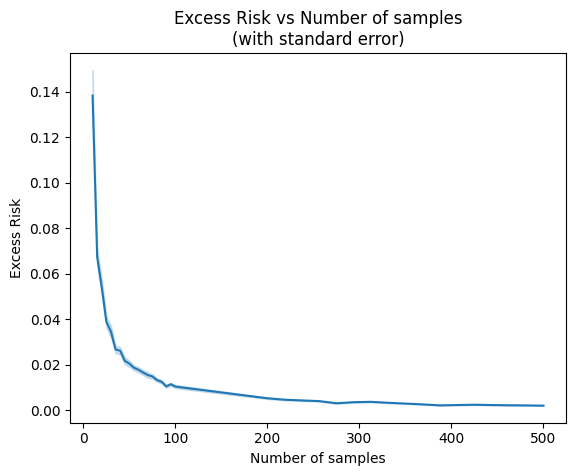

In [84]:
sns.lineplot(df, x = 'n', y = 'Excess Risk', errorbar = "se")
plt.xlabel("Number of samples")
plt.title("Excess Risk vs Number of samples\n(with standard error)")
plt.show()

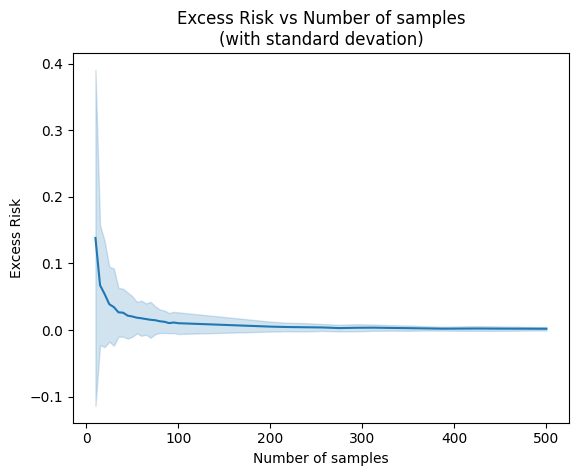

In [85]:
sns.lineplot(df, x="n", y="Excess Risk", errorbar="sd")
plt.xlabel("Number of samples")
plt.title("Excess Risk vs Number of samples\n(with standard devation)")
plt.show()